In [1]:
import BioSimSpace as BSS


Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



### Parameterise Ligand with GAFF 2 and Save

In [7]:
unparam_lig = BSS.IO.readMolecules('mif180_ligand.pdb')[0]

In [8]:
lig = BSS.Parameters.gaff2(unparam_lig).getMolecule()

In [9]:
BSS.IO.saveMolecules('lig_param',lig,['PRM7','RST7','PDB'])

['/home/finlayclark/Documents/research/restraint_comparison_mif/testing/dg_bind_syn_param_unique/free/input/lig_param.prm7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/dg_bind_syn_param_unique/free/input/lig_param.rst7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/dg_bind_syn_param_unique/free/input/lig_param.pdb']

### Create and Save Solvated Ligand

In [21]:
lig_solvated = BSS.Solvent.tip3p(molecule=lig, box=3*[40*BSS.Units.Length.angstrom], ion_conc = 0.15)

In [22]:
view = BSS.Notebook.View(lig_solvated)

In [23]:
view.system()

NGLWidget(gui_style='ngl')

## Minimisation

In [25]:
minimisation_protocol = BSS.Protocol.Minimisation(steps = 1000)

In [26]:
minimisation_process = BSS.Process.Amber(lig_solvated, minimisation_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd')

In [27]:
minimisation_process.start()

BioSimSpace.Process.Amber(<BioSimSpace.System: nMolecules=2154>, BioSimSpace.Protocol.Minimisation(steps=1000), exe='/home/finlayclark/software/amber20/bin/pmemd', name='amber', work_dir='/tmp/tmp77u2ju4n', seed=None)

In [31]:
minimisation_process.getTotalEnergy(time_series=True)

[1.4424e+04 kcal/mol]

In [33]:
lig_solvated_minimised = minimisation_process.getSystem(block=True)

In [30]:
#BSS.IO.saveMolecules("lig_solvated_minimised", system_solvated_minimised, ["prm7", "rst7","pdb"])

['/home/finlayclark/Documents/research/restraint_comparison_mif/testing/somd_tut/system_solvated_minimised.prm7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/somd_tut/system_solvated_minimised.rst7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/somd_tut/system_solvated_minimised.pdb']

## Equilibration

#### PMEMD NVT equilibration for 5 ps while restraining all non-solvent atoms

In [34]:
equil1_protocol = BSS.Protocol.Equilibration(
                                runtime=5*BSS.Units.Time.picosecond, 
                                temperature_start=0*BSS.Units.Temperature.kelvin, 
                                temperature_end=300*BSS.Units.Temperature.kelvin,
                                restraint="all"
                                )

In [35]:
equil1_process = BSS.Process.Amber(lig_solvated_minimised, equil1_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd')

In [37]:
equil1_process.start()

In [45]:
equil1_process.isRunning()

False

In [46]:
equil1_process.getTotalEnergy(time_series=True)

[-2.9481e+04 kcal/mol]

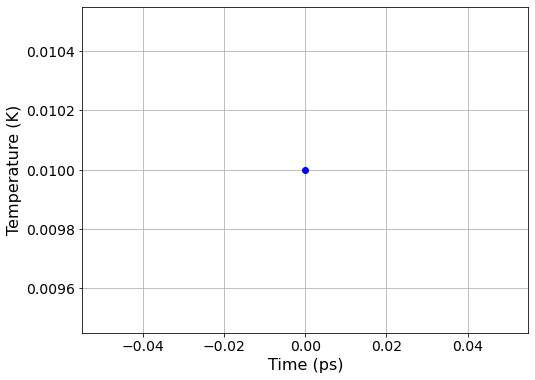

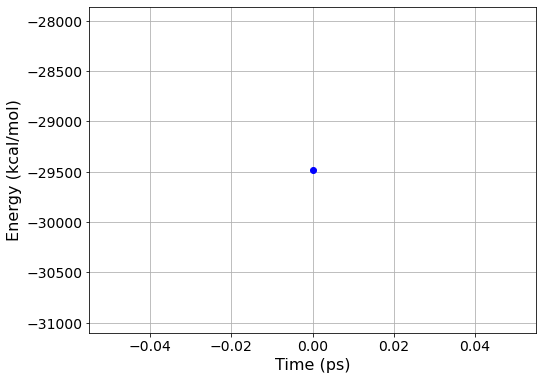

In [47]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(equil1_process.getTime(time_series=True), equil1_process.getTemperature(time_series=True))

# Generate a plot of time vs energy.
plot2 = BSS.Notebook.plot(equil1_process.getTime(time_series=True), equil1_process.getTotalEnergy(time_series=True))

In [48]:
system_equil1 = equil1_process.getSystem(block=True)

#### PMEMD NVT equilibration for 5 ps without restraints

In [49]:
equil3_protocol = BSS.Protocol.Equilibration(
                                runtime=5*BSS.Units.Time.picosecond, 
                                temperature_end=300*BSS.Units.Temperature.kelvin,
                                )

In [50]:
equil3_process = BSS.Process.Amber(system_equil1, equil3_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd')

In [51]:
equil3_process.start()

BioSimSpace.Process.Amber(<BioSimSpace.System: nMolecules=2154>, BioSimSpace.Protocol.Equilibration(timestep=2.0000 fs, runtime=5.0000 ps, temperature_start=300.0000 K, temperature_end=300.0000 K, pressure=None, report_interval=100, restart_interval=500, restraint=None), exe='/home/finlayclark/software/amber20/bin/pmemd', name='amber', work_dir='/tmp/tmp6fcvwqmm', seed=None)

In [56]:
equil3_process.isRunning()

True

In [60]:
equil3_process.getTotalEnergy(time_series=True)

[-2.2903e+04 kcal/mol]

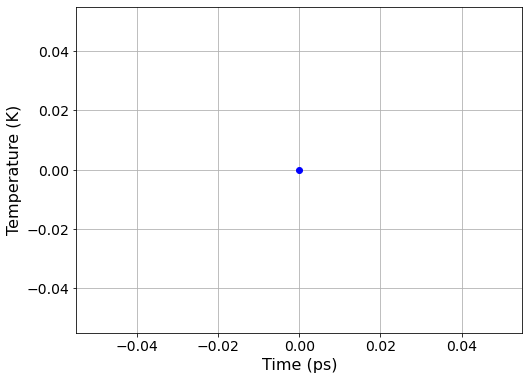

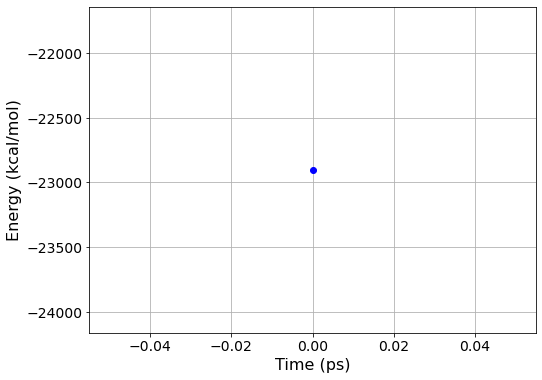

In [58]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(equil3_process.getTime(time_series=True), equil3_process.getTemperature(time_series=True))

# Generate a plot of time vs energy.
plot2 = BSS.Notebook.plot(equil3_process.getTime(time_series=True), equil3_process.getTotalEnergy(time_series=True))

In [59]:
system_equil3 = equil3_process.getSystem(block=True)

#### PMEMD NPT equilibration for 400 ps without restraints

In [62]:
equil5_protocol = BSS.Protocol.Equilibration(
                                runtime=400*BSS.Units.Time.picosecond, 
                                pressure=1*BSS.Units.Pressure.atm,
                                temperature=300*BSS.Units.Temperature.kelvin)

In [64]:
equil5_process = BSS.Process.Amber(system_equil3, equil5_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd.cuda')

In [66]:
equil5_process.start()

In [67]:
equil5_process.isRunning()

True

In [73]:
equil5_process.getTotalEnergy()

-1.7626e+04 kcal/mol

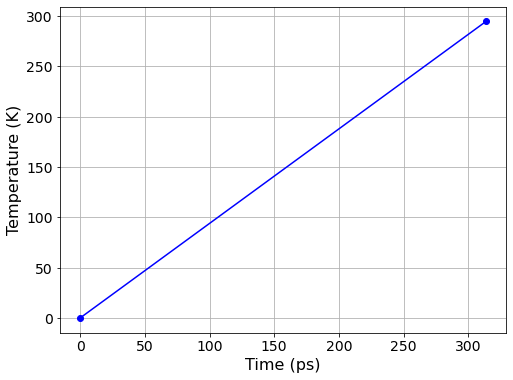

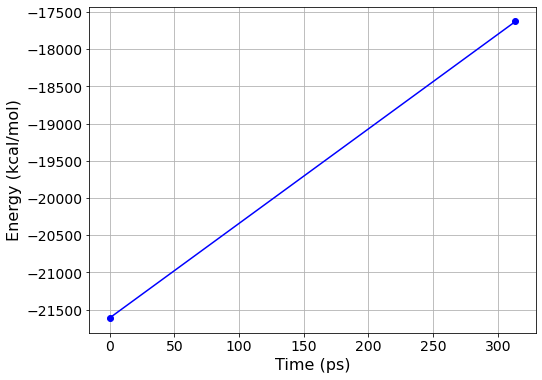

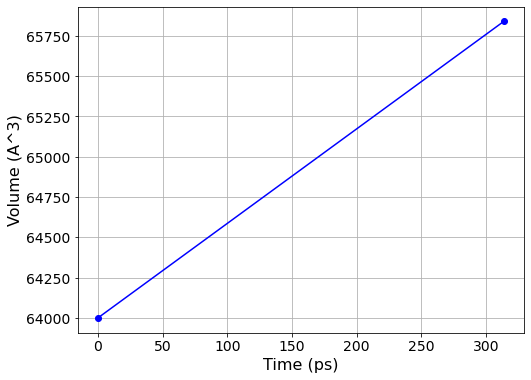

In [74]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(equil5_process.getTime(time_series=True), equil5_process.getTemperature(time_series=True))

# Generate a plot of time vs energy.
plot2 = BSS.Notebook.plot(equil5_process.getTime(time_series=True), equil5_process.getTotalEnergy(time_series=True))

# Generate a plot of time vs volume.
plot2 = BSS.Notebook.plot(equil5_process.getTime(time_series=True), equil5_process.getVolume(time_series=True))

In [71]:
lig_solvated_equil_final = equil5_process.getSystem(block=True)

In [75]:
BSS.IO.saveMolecules("lig_solvated_equilibrated", lig_solvated_equil_final, ["prm7", "rst7", "pdb"])

['/home/finlayclark/Documents/research/restraint_comparison_mif/testing/dg_bind_syn_param_unique/free/input/lig_solvated_equilibrated.prm7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/dg_bind_syn_param_unique/free/input/lig_solvated_equilibrated.rst7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/dg_bind_syn_param_unique/free/input/lig_solvated_equilibrated.pdb']

In [77]:
view = BSS.Notebook.View(lig_solvated_equil_final)
view.molecule(0)

NGLWidget(gui_style='ngl')